In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

Using TensorFlow backend.


In [3]:
max_features = 10000
maxlen = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = max_features)

print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

25000 train sequences
25000 test sequences


In [7]:
print('pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen = maxlen)
input_test = sequence.pad_sequences(input_test, maxlen= maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [14]:
from keras.layers import Embedding, Flatten, SimpleRNN, Dense
from keras.models import Sequential

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

history = model.fit(input_train, y_train,
                   epochs = 10,
                   batch_size = 128,
                   validation_split  = 0.2)

W0713 21:25:23.155011 16028 deprecation_wrapper.py:119] From C:\Users\Business Intelli\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0713 21:25:23.183936 16028 deprecation_wrapper.py:119] From C:\Users\Business Intelli\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0713 21:25:23.190914 16028 deprecation.py:323] From C:\Users\Business Intelli\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0713 21:25:23.567447 16028 deprecation_wrapper.py:119] From C:\Users\Business Intelli\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.6154 - acc: 0.6491 - val_loss: 0.4771 - val_acc: 0.7804
Epoch 2/10
20000/20000 [==============================] - 20s 1ms/step - loss: 0.3720 - acc: 0.8478 - val_loss: 0.4103 - val_acc: 0.8178
Epoch 3/10
20000/20000 [==============================] - 19s 956us/step - loss: 0.2608 - acc: 0.8976 - val_loss: 0.3318 - val_acc: 0.8690
Epoch 4/10
20000/20000 [==============================] - 19s 953us/step - loss: 0.1813 - acc: 0.9343 - val_loss: 0.5301 - val_acc: 0.7440
Epoch 5/10
20000/20000 [==============================] - 19s 957us/step - loss: 0.1241 - acc: 0.9583 - val_loss: 0.4750 - val_acc: 0.7976
Epoch 6/10
20000/20000 [==============================] - 20s 982us/step - loss: 0.0778 - acc: 0.9754 - val_loss: 0.4173 - val_acc: 0.8530
Epoch 7/10
20000/20000 [==============================] - 19s 964us/step - loss: 0.0493 - acc: 0.9849 - val_loss: 0.5519 

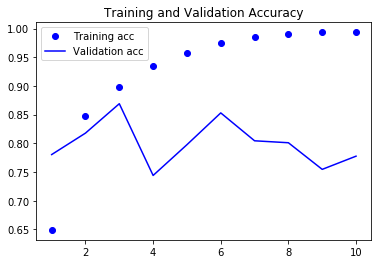

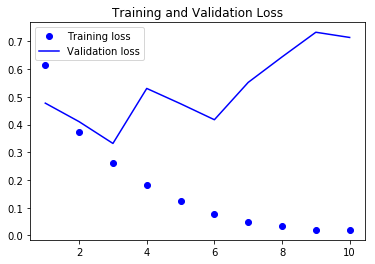

In [16]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = "Training acc")
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title("Training and Validation Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title("Training and Validation Loss")
plt.legend()

plt.show()